In [1]:
# this noot book fro capston final exam

In [2]:
pip install geopy --user

     |████████████████████████████████| 112kB 4.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import Packages
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5.

In [2]:
newyork= pd.read_csv('new york.csv')
newyork.head()


,Borough,Neighborhood,Latitude,Longitude,Median Sale Price
0,Bronx,Wakefield,40.894705,-73.847201,315620
1,Bronx,Eastchester,40.887556,-73.827806,505000
2,Bronx,Fieldston,40.895437,-73.905643,220968
3,Bronx,Riverdale,40.890834,-73.912585,347500
4,Bronx,Kingsbridge,40.881687,-73.902818,190000


In [3]:
# 2- Cluster Neighborhoods
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 

# 2-1 Normalizing over the standard deviation
newyork_p=newyork['Median Sale Price']
newyork_p=pd.DataFrame(data=newyork_p)
newyork_p.head()

,Median Sale Price
0,315620
1,505000
2,220968
3,347500
4,190000


In [4]:
from sklearn.preprocessing import StandardScaler
X = newyork_p.values[:,1:]
X = np.nan_to_num(newyork_p)
Clus_dataSet = StandardScaler().fit_transform(newyork_p)
Clus_dataSet

X



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 315620],
       [ 505000],
       [ 220968],
       [ 347500],
       [ 190000],
       [ 390000],
       [ 562500],
       [  70000],
       [ 257365],
       [ 515000],
       [ 999000],
       [ 435000],
       [ 135000],
       [ 235000],
       [ 255000],
       [  79000],
       [ 101625],
       [ 144353],
       [ 470000],
       [ 498888],
       [ 736000],
       [ 101000],
       [  75000],
       [  84964],
       [ 285080],
       [ 395000],
       [ 412336],
       [ 597500],
       [ 180000],
       [ 135000],
       [ 505000],
       [ 480000],
       [ 449000],
       [ 287500],
       [ 242500],
       [ 460000],
       [ 445000],
       [ 571250],
       [ 345000],
       [ 476580],
       [ 526000],
       [ 371500],
       [ 716400],
       [ 543000],
       [1172500],
       [ 390000],
       [ 410000],
       [ 415000],
       [ 495000],
       [ 715000],
       [ 461000],
       [ 508500],
       [ 649500],
       [1019999],
       [ 452000],
       [ 9

In [5]:
# 2-Modeling  ### cluster Numbers = 3

# 3- Cluster Neighborhoods
# 3-1 Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 3


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [7]:
# 3- assign the labels to each row in dataframe
newyork["Cluster Labels"] = kmeans.labels_
newyork.head()

,Borough,Neighborhood,Latitude,Longitude,Median Sale Price,Cluster Labels
0,Bronx,Wakefield,40.894705,-73.847201,315620,0
1,Bronx,Eastchester,40.887556,-73.827806,505000,0
2,Bronx,Fieldston,40.895437,-73.905643,220968,0
3,Bronx,Riverdale,40.890834,-73.912585,347500,0
4,Bronx,Kingsbridge,40.881687,-73.902818,190000,0


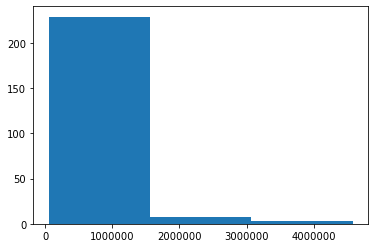

In [8]:
x = newyork['Median Sale Price']
plt.hist(x, bins = 3)
plt.show()


In [9]:
# add clustering labels

# 3-3  visualize the resulting clusters
# create map
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newyork['Latitude'], newyork['Longitude'], newyork['Neighborhood'], newyork['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [10]:
# 4- Examine Clusters change condition from 0:5 for 5 tries
# cluster 1
c1=newyork.loc[newyork['Cluster Labels'] == 0, newyork.columns[[1] + list(range(5, newyork.shape[1]))]]
c1.shape[0]


149

In [11]:
# cluster 2
c2=newyork.loc[newyork['Cluster Labels'] == 1, newyork.columns[[1] + list(range(5, newyork.shape[1]))]]
c2.head()
c2.shape[0]

11

In [12]:
# cluster 3
c3=newyork.loc[newyork['Cluster Labels'] == 2, newyork.columns[[1] + list(range(5, newyork.shape[1]))]]
c3.head()
c3.shape[0]

80